In [1]:
import pandas as pd

In [36]:
df=pd.read_csv('globalterrorism.csv',encoding = "ISO-8859-1")
df

C:\Users\USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


## Ajoutons une nouvelle colonne date qui va nous permettre de classer directement par date les observations

In [37]:
df["iday"].unique()

array([ 2,  0,  1,  3,  6,  8,  9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22,
       25, 26, 27, 28, 30, 31,  4,  7, 16, 17, 18, 23, 24,  5, 29],
      dtype=int64)

In [38]:
df["imonth"].unique()

array([ 7,  0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12], dtype=int64)

In [39]:
df["iyear"].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [40]:
df[(df["iday"] == 0)].index.__len__()

891

In [41]:
df[(df["imonth"] == 0)].index.__len__()

20

In [42]:
# Let's remove some lines by the indexes
df.drop(index = df[(df["iday"] == 0)].index, axis = 0, inplace = True)

In [43]:
# Let's remove some lines by the indexes
df.drop(index = df[(df["imonth"] == 0)].index, axis = 0, inplace = True)

In [44]:
df["iday"].unique()

array([ 2,  1,  3,  6,  8,  9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22, 25,
       26, 27, 28, 30, 31,  4,  7, 16, 17, 18, 23, 24,  5, 29],
      dtype=int64)

In [45]:
df["imonth"].unique()

array([ 7,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12], dtype=int64)

In [46]:
# create a new column named as date
df['date'] = df["iyear"].astype("str") + "-" + df["imonth"].astype("str") + "-" + df["iday"].astype("str")

In [47]:
df["date"]

0           1970-7-2
5           1970-1-1
6           1970-1-2
7           1970-1-2
8           1970-1-2
             ...    
181686    2017-12-31
181687    2017-12-31
181688    2017-12-31
181689    2017-12-31
181690    2017-12-31
Name: date, Length: 180800, dtype: object

In [48]:
df["date"] = pd.to_datetime(df['date'])

In [49]:
df.sort_values('date', inplace=True)

In [50]:
df["date"].dtype

dtype('<M8[ns]')

In [51]:
df['date']

5        1970-01-01
10       1970-01-01
6        1970-01-02
7        1970-01-02
8        1970-01-02
            ...    
181644   2017-12-31
181645   2017-12-31
181653   2017-12-31
181676   2017-12-31
181690   2017-12-31
Name: date, Length: 180800, dtype: datetime64[ns]

## Traitement des valeurs manquantes

In [52]:
missing_percentages = df.isna().sum().sort_values(ascending = False)/len(df)
missing_percentages

gsubname3           0.999889
weapsubtype4_txt    0.999613
weapsubtype4        0.999613
weaptype4_txt       0.999596
weaptype4           0.999596
                      ...   
targtype1_txt       0.000000
gname               0.000000
iyear               0.000000
weaptype1           0.000000
date                0.000000
Length: 136, dtype: float64

__Suprimons les colonnes ayant plus de 15% da valeur manquante__

In [53]:
liste_empty_columns = list(missing_percentages[missing_percentages > 0.15].index.values)

In [54]:
df.drop(liste_empty_columns,inplace=True,axis=1)

In [55]:
df.drop(['iyear','imonth','iday'],inplace=True,axis=1)

__Remplacement des valeurs manquantes dans les variables quantitatives par 0.__

In [57]:
quant = df.columns[~df.columns.isin(df.select_dtypes('object').columns.to_list())]

In [58]:
df[quant] = df[quant].fillna(0)

__On constate que seules les variables qualitatives contiennent des valeurs manquantes. On remplacera par des guillemets.__

In [59]:
qual = df.select_dtypes('object').columns

In [60]:
df[qual] = df[qual].fillna("''")                      

In [61]:
missing_percentages = df.isna().sum().sort_values(ascending = False)/len(df)
missing_percentages

eventid             0.0
targsubtype1        0.0
target1             0.0
natlty1             0.0
natlty1_txt         0.0
gname               0.0
guncertain1         0.0
individual          0.0
weaptype1           0.0
weaptype1_txt       0.0
weapsubtype1        0.0
weapsubtype1_txt    0.0
nkill               0.0
nwound              0.0
property            0.0
ishostkid           0.0
dbsource            0.0
INT_LOG             0.0
INT_IDEO            0.0
INT_MISC            0.0
INT_ANY             0.0
targsubtype1_txt    0.0
targtype1_txt       0.0
extended            0.0
targtype1           0.0
country             0.0
country_txt         0.0
region              0.0
region_txt          0.0
provstate           0.0
city                0.0
latitude            0.0
longitude           0.0
specificity         0.0
vicinity            0.0
crit1               0.0
crit2               0.0
crit3               0.0
doubtterr           0.0
multiple            0.0
success             0.0
suicide         

In [63]:
df.to_csv("./terrorism.csv", index = False)

In [12]:
df1=pd.read_csv("terrorism.csv")

In [13]:
pd.options.display.max_columns = df1.shape[1]

In [14]:
df1.head()

,eventid,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,date
0,197001010002,0,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,1,1,1,0.0,0.0,1,0,2,Armed Assault,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Headquarters,217.0,United States,Black Nationalists,0.0,0,5,Firearms,5.0,Unknown Gun Type,0.0,0.0,1,0.0,Hewitt Project,-9,-9,0,-9,1970-01-01
1,197001050001,0,217,United States,1,North America,Wisconsin,Baraboo,43.468500,-89.744299,1.0,0,1,1,0,1.0,0.0,0,0,3,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Badger Army ammo depot.,217.0,United States,"Weather Underground, Weathermen",0.0,0,6,Explosives,16.0,Unknown Explosive Type,0.0,0.0,0,0.0,PGIS,0,0,0,0,1970-01-01
2,197001020001,0,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,1,1,1,0.0,0.0,0,0,1,Assassination,3,Police,25.0,Police Security Forces/Officers,Juan Maria de Lucah/Chief of Directorate of in...,218.0,Uruguay,Tupamaros (Uruguay),0.0,0,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,0.0,0.0,0,0.0,PGIS,0,0,0,0,1970-01-02
3,197001020002,0,217,United States,1,North America,California,Oakland,37.791927,-122.225906,1.0,0,1,1,1,1.0,0.0,1,0,3,Bombing/Explosion,21,Utilities,107.0,Electricity,Edes Substation,217.0,United States,Unknown,0.0,0,6,Explosives,16.0,Unknown Explosive Type,0.0,0.0,1,0.0,Hewitt Project,-9,-9,0,-9,1970-01-02
4,197001020003,0,217,United States,1,North America,Wisconsin,Madison,43.076592,-89.412488,1.0,0,1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,4,Military,28.0,Military Recruiting Station/Academy,"R.O.T.C. offices at University of Wisconsin, M...",217.0,United States,New Year's Gang,0.0,0,8,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,0.0,0.0,1,0.0,Hewitt Project,0,0,0,0,1970-01-02


In [27]:
df.drop(['attacktype1_txt','country_txt','region_txt','targtype1_txt','targsubtype1','targsubtype1_txt','natlty1_txt','weaptype1_txt','weapsubtype1_txt'],inplace=True,axis=1)

In [37]:
df.drop(['target1'],inplace=True,axis=1)

In [38]:
df.to_csv("./terrorism.csv", index = False)

In [32]:
df=pd.read_csv('terrorism.csv',encoding = "ISO-8859-1")
df.drop(['INT_LOG','INT_IDEO','INT_MISC','INT_ANY'],inplace=True,axis=1)
df.to_csv("./terrorism.csv", index = False)

In [39]:
df=pd.read_csv('terrorism.csv',encoding = "ISO-8859-1")

In [40]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180800 entries, 0 to 180799
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   eventid       180800 non-null  int64  
 1   extended      180800 non-null  int64  
 2   country       180800 non-null  int64  
 3   region        180800 non-null  int64  
 4   provstate     180800 non-null  object 
 5   city          180800 non-null  object 
 6   latitude      180800 non-null  float64
 7   longitude     180800 non-null  float64
 8   specificity   180800 non-null  float64
 9   vicinity      180800 non-null  int64  
 10  crit1         180800 non-null  int64  
 11  crit2         180800 non-null  int64  
 12  crit3         180800 non-null  int64  
 13  doubtterr     180800 non-null  float64
 14  multiple      180800 non-null  float64
 15  success       180800 non-null  int64  
 16  suicide       180800 non-null  int64  
 17  attacktype1   180800 non-null  int64  
 18  targ

In [42]:
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [43]:
df=df.set_index('date')
df

,eventid,extended,country,region,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,natlty1,gname,guncertain1,individual,weaptype1,weapsubtype1,nkill,nwound,property,ishostkid,dbsource
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970-01-01,197001010002,0,217,1,Illinois,Cairo,37.005105,-89.176269,1.0,0,1,1,1,0.0,0.0,1,0,2,3,217.0,Black Nationalists,0.0,0,5,5.0,0.0,0.0,1,0.0,Hewitt Project
1970-01-01,197001050001,0,217,1,Wisconsin,Baraboo,43.468500,-89.744299,1.0,0,1,1,0,1.0,0.0,0,0,3,4,217.0,"Weather Underground, Weathermen",0.0,0,6,16.0,0.0,0.0,0,0.0,PGIS
1970-01-02,197001020001,0,218,3,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,1,1,1,0.0,0.0,0,0,1,3,218.0,Tupamaros (Uruguay),0.0,0,5,2.0,0.0,0.0,0,0.0,PGIS
1970-01-02,197001020002,0,217,1,California,Oakland,37.791927,-122.225906,1.0,0,1,1,1,1.0,0.0,1,0,3,21,217.0,Unknown,0.0,0,6,16.0,0.0,0.0,1,0.0,Hewitt Project
1970-01-02,197001020003,0,217,1,Wisconsin,Madison,43.076592,-89.412488,1.0,0,1,1,1,0.0,0.0,1,0,7,4,217.0,New Year's Gang,0.0,0,8,19.0,0.0,0.0,1,0.0,Hewitt Project
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31,201712290032,0,78,8,Attica,Piraeus,37.969891,23.642225,1.0,0,1,1,1,0.0,1.0,1,0,9,14,153.0,Crypteia,0.0,0,13,0.0,0.0,0.0,-9,0.0,START Primary Collection
2017-12-31,201712300002,0,95,10,Kirkuk,Kirkuk,35.452110,44.375465,1.0,0,1,1,1,0.0,0.0,1,0,3,2,95.0,Unknown,0.0,0,6,17.0,0.0,0.0,0,0.0,START Primary Collection
2017-12-31,201712300011,0,37,11,Extreme-North,Bia,11.169421,14.092274,1.0,0,1,1,1,0.0,0.0,1,1,3,1,37.0,Boko Haram,1.0,0,6,13.0,2.0,28.0,1,0.0,START Primary Collection


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

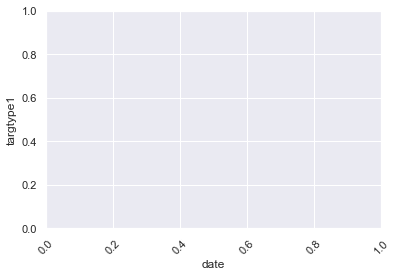

In [44]:
sns.set()
plt.ylabel('targtype1')
plt.xlabel('date')
plt.xticks(rotation=45)

In [47]:
plt.plot(df.index, df['targtype1'], )

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002A33E54E798> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002A33E41AA68> (for post_execute):


KeyboardInterrupt: 

__Fractionnement des données pour la formation et les tests__

In [48]:
train = df[df.index < pd.to_datetime("2010-12-31", format='%Y-%m-%d')]
test = df[df.index > pd.to_datetime("2010-12-31", format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

TypeError: '<' not supported between instances of 'str' and 'Timestamp'